In [1]:
from imblearn.over_sampling import ADASYN
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import time , smogn ,warnings ,logging
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, train_test_split
from flaml import tune
from flaml.tune.searcher import BlendSearch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, average_precision_score
import seaborn as sns
import optuna
import sdv
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')



In [2]:
X_train = pd.read_csv("/home/jovyan/work/juningpar/onsp/xgb_june/data/X_train.csv")
y_train  = pd.read_csv("/home/jovyan/work/juningpar/onsp/xgb_june/data/y_train.csv")
X_test = pd.read_csv("/home/jovyan/work/juningpar/onsp/xgb_june/data/X_test.csv")
y_test = pd.read_csv("/home/jovyan/work/juningpar/onsp/xgb_june/data/y_test.csv")

In [8]:
    import sys
    sys.path.append("./ooo")  # เพิ่ม path ของโฟลเดอร์
    from over import generate_synthetic_data          # นำเข้าทุกฟังก์ชันจาก over.py

In [10]:
X_resampled, y_resampled = generate_synthetic_data(X_train, y_train, target_class=1, target_count=80)


In [13]:
X_resampled.to_csv("./data/X_resampled.csv", index=False)

In [12]:
y_resampled

qty fail hd dwc
0                   1
1                   1
2                   1
3                   1
4                   1
...               ...
4889                1
4890                1
4891                1
4892                1
4893                1

[4894 rows x 1 columns]

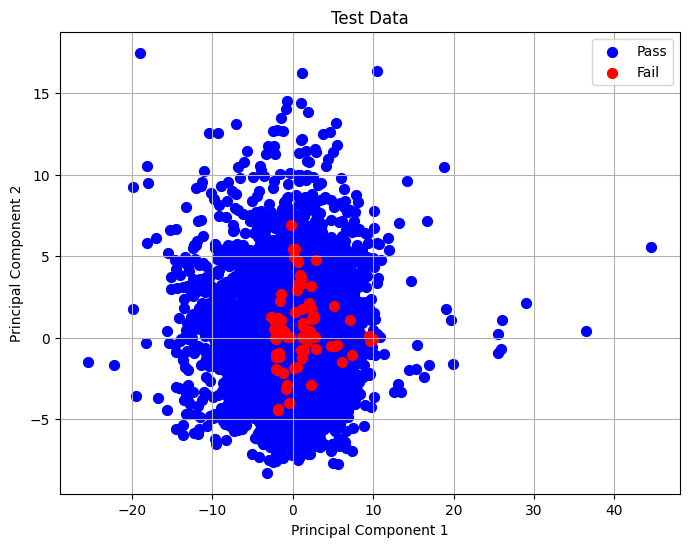

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, index=X_resampled.index, columns=['PCA1', 'PCA2'])
pca_df['target'] = y_resampled

plt.figure(figsize=(8, 6))

indices_0 = pca_df['target'] == 0
plt.scatter(pca_df.loc[indices_0, 'PCA1'], pca_df.loc[indices_0, 'PCA2'], c='b', s=50, label='Pass')

# วาดกลุ่ม label 1 ให้แสดงอยู่ด้านหน้า
indices_1 = pca_df['target'] == 1
plt.scatter(pca_df.loc[indices_1, 'PCA1'], pca_df.loc[indices_1, 'PCA2'], c='r', s=50, label='Fail')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Test Data')
plt.legend()
plt.grid()
plt.show()